<a href="https://colab.research.google.com/github/AzretU/Lab2/blob/master/Lab2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install pandas
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
df = pd.read_csv('/content/movies.csv')

---

**Избавляемся от пропусков путем удаления строк с пропусками**

---

In [6]:
df.isna().mean()

Title                0.000
Rating               0.001
Year                 0.000
Month                0.000
Certificate          0.017
Runtime              0.000
Directors            0.000
Stars                0.000
Genre                0.000
Filming_location     0.000
Budget               0.000
Income               0.000
Country_of_origin    0.000
dtype: float64

In [7]:
df = df.dropna(axis=0, how='any')

In [8]:
df.isna().mean()

Title                0.0
Rating               0.0
Year                 0.0
Month                0.0
Certificate          0.0
Runtime              0.0
Directors            0.0
Stars                0.0
Genre                0.0
Filming_location     0.0
Budget               0.0
Income               0.0
Country_of_origin    0.0
dtype: float64

---
**Так как процент пропусков мал, то данный способ не грозит потерей большого 
количества данных или потерей объективности**

---



---
**Категоризация признаков. Категоризация сертификата MMPA с помощью метода one-hot encoding**
---

---



In [12]:
pd.get_dummies(df[['Certificate']]).head(15)

,Certificate_G,Certificate_NC-17,Certificate_Not Rated,Certificate_PG,Certificate_PG-13,Certificate_R,Certificate_TV-14,Certificate_TV-G,Certificate_TV-MA,Certificate_TV-PG,Certificate_TV-Y7,Certificate_Unrated
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0,0
10,0,0,0,0,0,1,0,0,0,0,0,0


---
**Нормализация данных методом Бокса-Кокса**
---


---





<AxesSubplot:xlabel='Rating'>

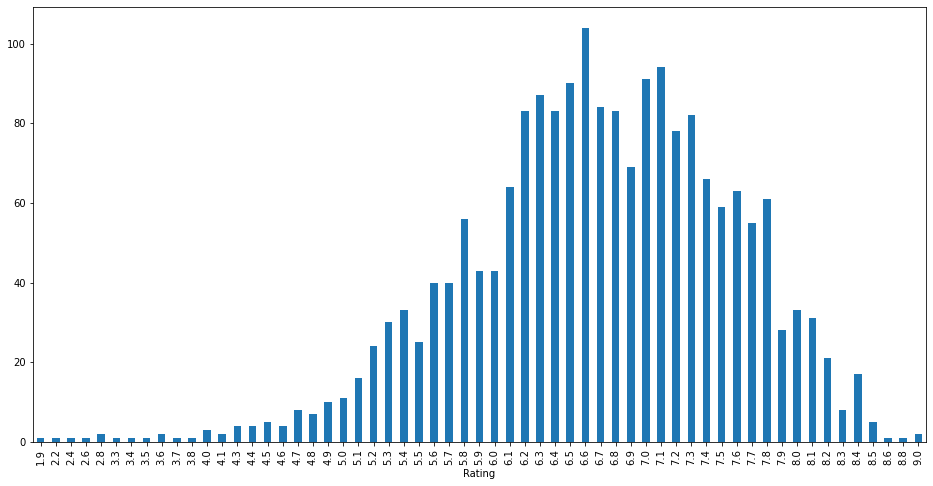

In [20]:
df.groupby('Rating')['Year'].agg('count').plot(kind = 'bar',figsize=( 16 , 8 ))

In [24]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    plt.figure(figsize=(20,10))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

<ipython-input-25-e7db1f62536b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating_boxcox'], param = stats.boxcox(df['Rating'])


Оптимальное значение λ = 2.2399056678483884


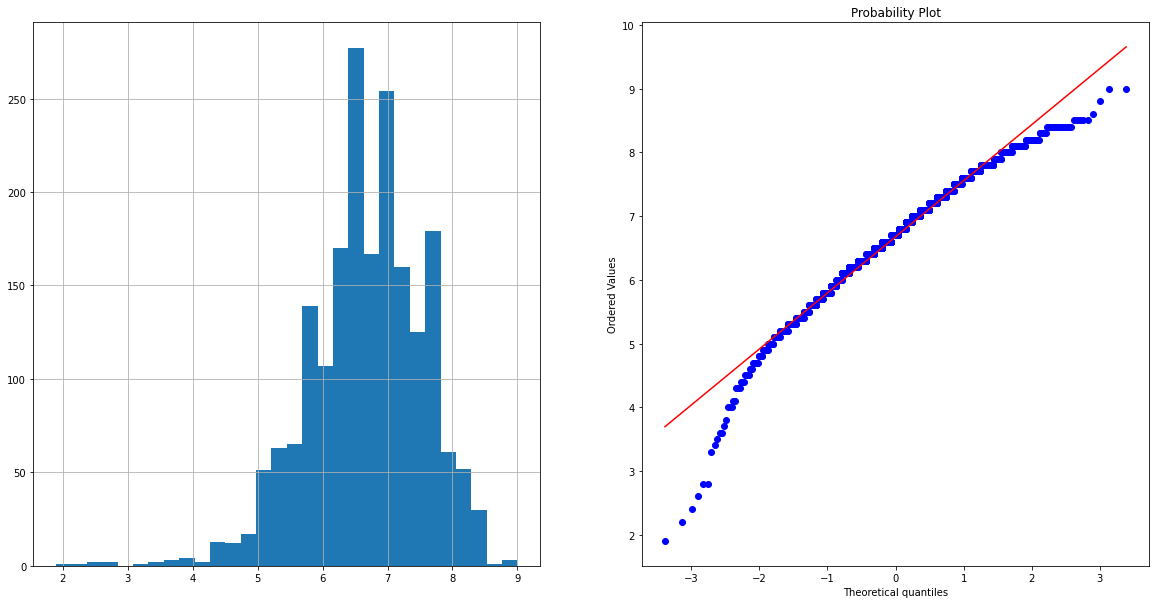

In [25]:
df['Rating_boxcox'], param = stats.boxcox(df['Rating']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(df, 'Rating')